## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import scipy.stats as st
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [6]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary analysis

In [7]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort('Number of Discharges')

C:\Users\Kimmy\Anaconda3\lib\site-packages\pandas\core\indexing.py:385: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead
  self.obj[item] = s


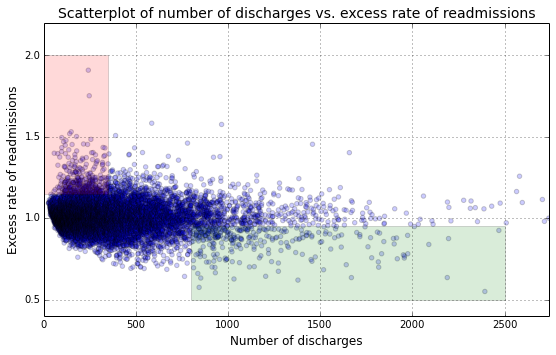

In [8]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

# A. Do you agree with the above analysis and recommendations? Why or why not?

I do not quite agree with the analysis performed above. The statistics analysis in Section B is puely based on the calculations of means and proportion without actually testing the statistical significance. Also the observations described in Section A tend to ignore a significant number of data points that correspond to the excess rate of readmission > 1 for relatively large number of discharges (>1000). A proper statistical analysis should be performed. 

# B. Provide support for your arguments and your own recommendations with a statistically sound analysis

In order to test if there is a significant correlation between hospital capacity (number of discharges) and readmission rates, we will set up one-sample hypothesis test:
* H0: there is **no correlation** between number of discharges and readmission rates 
* H1: number of discharges correlates with the readmission rates

The test will be performed for significance level of 1%

In [14]:
nd = np.array(x) # number of discharges
rr = np.array(y) # readmission rate

---------------------

### Statement in the analysis: *In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1* 

Is the true popullation mean > 1?

In [71]:
group = rr[nd<100]
meangroup = group.mean()
stdgroup = group.std()
ngroup = len(group)

The null hypothesis: In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1

In [72]:
p_value = st.norm.sf((meangroup-1)/(stdgroup/np.sqrt(ngroup)))
p_value

1.4999158300813369e-41

We can reject the null hypothesis

-------------------------------

### Statement in the analysis: *In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1* 

Is the true popullation mean < 1?

In [73]:
group = rr[nd>1000]
meangroup = group.mean()
stdgroup = group.std()
ngroup = len(group)

The null hypothesis: In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 1

In [74]:
p_value = st.norm.sf((meangroup-1)/(stdgroup/np.sqrt(ngroup)))
p_value

0.99991655952183933

We cannot reject the null hypothesis. Hospitals/facilities with number of discharges > 1000 do not solely correspond to excess readmission rate < 1

-----------------------

 ### Defining a function to calculate the difference between two groups 

In [76]:
# Group1 corresponds to "Low" number of discharges
# Group2 corresponds to "High" number of discharges 

def stats_test_hospitals(nd,rr, thresh):
    mask1 = nd<thresh
    mask2 = nd>thresh
    
    group1 = rr[mask1]
    group2 = rr[mask2]
    
    mean1 = group1.mean()
    std1 = group1.std()
    n1 = len(group1)
    
    mean2 = group2.mean()
    std2 = group2.std()
    n2 = len(group2)
    
    observed_diff = mean1 - mean2 # Observed difference between 2 groups
    estimated_std = np.sqrt(std1**2/n1 + std2**2/n2) # STD of sampled difference between 2 groups
    
    p_value = st.norm.sf((observed_diff-0)/estimated_std)
    
    if observed_diff>0: #Checking if sampled difference is actually > 0 
        flag = 1
    else:
        flag = 0 
    
    return p_value

In [77]:
thersh = np.arange(100,1500, 10)
p_value = [stats_test_hospitals(nd,rr, t) for t in thersh]

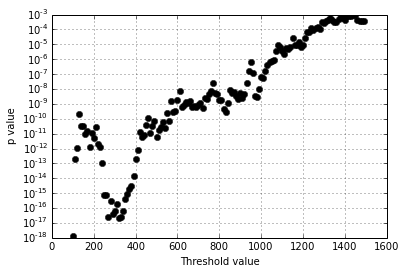

In [89]:
plt.plot(thersh, p_value, 'ok')
#plt.axhline(y=0.01, color = 'red')
#plt.ylim(ymax=0.1)
plt.ylabel('p value')
plt.xlabel('Threshold value')
plt.yscale('log')
plt.grid()

For different values of the threshold used to divide the data in two groups p-values << 0.01. Therefore we can reject the null hypothesis that there is no difference between hospitals with high/low number of discharges. 

### Estimating effect size of difference between two groups corresponding to high/low number of discharges

In [97]:
def relative_difference(nd,rr, thresh):
    mask1 = nd<thresh
    mask2 = nd>thresh
    
    group1 = rr[mask1]
    group2 = rr[mask2]
    
    relative_difference1 = ((group1.mean() - group2.mean()) / group1.mean())*100
    relative_difference2 = ((group1.mean() - group2.mean()) / group2.mean())*100
    
    return relative_difference1, relative_difference2  

In [93]:
def CohenEffectSize(nd,rr, thresh):
    mask1 = nd<thresh
    mask2 = nd>thresh
    
    group1 = rr[mask1]
    group2 = rr[mask2]
    """Compute Cohen's d.

    group1: Series or NumPy array
    group2: Series or NumPy array

    returns: float
    """
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [98]:
CD = [CohenEffectSize(nd,rr, t) for t in thersh]
reldif = [relative_difference(nd,rr, t) for t in thersh]

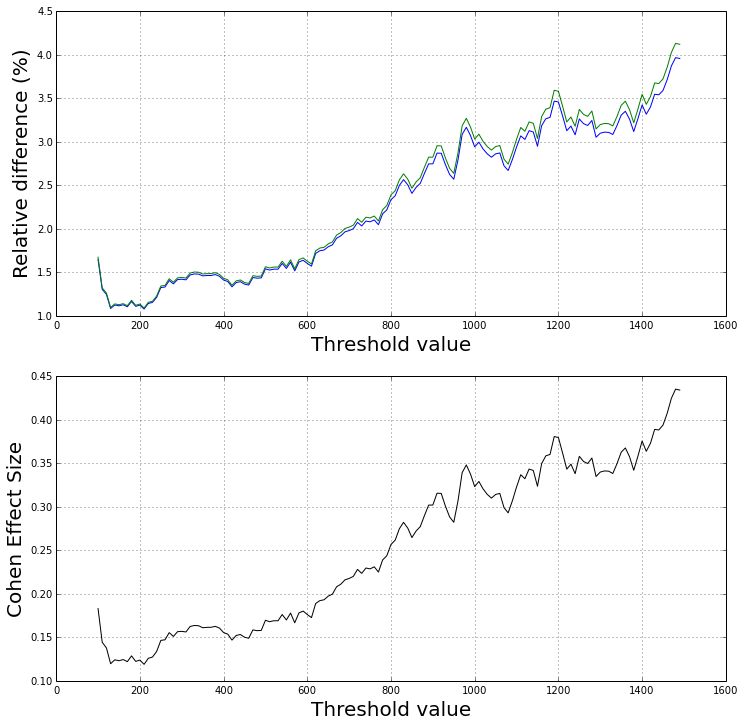

In [103]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.plot(thersh, reldif)
plt.ylabel('Relative difference (%)', fontsize = 20)
plt.xlabel('Threshold value', fontsize = 20)
plt.grid()

plt.subplot(2,1,2)
plt.plot(thersh, CD, '-k')
plt.ylabel('Cohen Effect Size', fontsize = 20)
plt.xlabel('Threshold value', fontsize = 20)
plt.grid()

The Effect Size seems to be quite small actually...